### 1. Max-flow to min-cost

#### a)
Denote nodes on the first line as 1,2,4,6,7,respectively from left to right; denote nodes on the second line as 3,5,6, respectively from left to right.<br>
$x_{ij}$ is the flow from i to j, $(i,j) \in \varepsilon$

let x =\begin{bmatrix}
x_{12}\\
x_{13}\\
x_{24}\\
x_{34}\\
x_{35}\\
x_{46}\\
x_{57}\\
x_{67}\\
\end{bmatrix}
Then A =\begin{bmatrix}
1&1&0&0&0&0&0&0\\
-1&0&1&0&0&0&0&0\\
0&-1&0&1&1&0&0&0\\
0&0&-1&-1&0&1&0&0\\
0&0&0&0&-1&0&1&0\\
0&0&0&0&0&-1&0&1\\
0&0&0&0&0&0&-1&-1\\
\end{bmatrix}
$q_{ij}$ is the maximum flow from i to j,$(i,j) \in \varepsilon$.<br>
q = \begin{bmatrix}
3\\
2\\
1\\
4\\
2\\
3\\
3\\
2\\
\end{bmatrix}
$p_{ij}$ is the minimum flow from i to j,$(i,j) \in \varepsilon$.<br>
p = \begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}

#### b)
We transform the max flow problem into min-cost flow problem. <br>
In such case, x =\begin{bmatrix}
x_{12}\\
x_{13}\\
x_{24}\\
x_{34}\\
x_{35}\\
x_{46}\\
x_{57}\\
x_{67}\\
x_{71}\\
\end{bmatrix}
p and q don't change much,except for the constraint of the added feedback path.<br>
p = \begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}
q = \begin{bmatrix}
3\\
2\\
1\\
4\\
2\\
3\\
3\\
2\\
\infty\\
\end{bmatrix}
c = \begin{bmatrix}
0&0&0&0&0&0&0&0&-1\\
\end{bmatrix}
b = \begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}

#### c)
The minimum cut of the this graph is 3, the edges in cut are (1,3) and (2,4).<br>
The variables in the dual problem has the relations:<br>
$\lambda_j - \lambda_i = \mu_{ij}$<br> 
$\lambda_1 = 0$<br> 
$\lambda_7 = 1$ 


### 2. The chess problem

#### a)

In [20]:
using JuMP, Clp
m = Model(solver=ClpSolver())
@variable(m,s>=0)
@variable(m,l>=0)
@constraint(m, 3s + 2l <= 160)
@constraint(m, s + 4l <= 200)
@objective(m, Max, 5s+8l)
status = solve(m)
println(getobjectivevalue(m))
m

472.0


Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is Clp

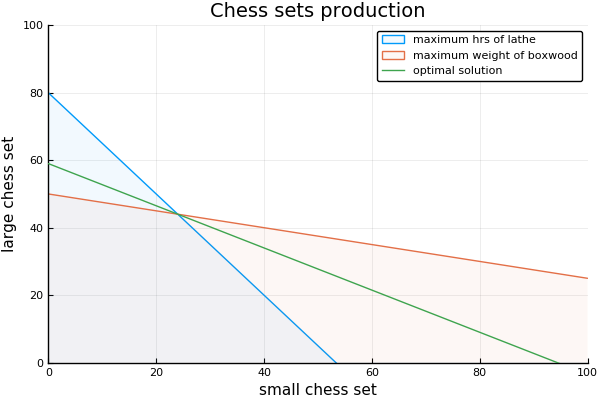

In [28]:
using Plots
pyplot()
x = 0:100

y = 80 .- (3/2)x
z = 50 .- (1/4)x 
n = 472/8 .- (5/8)x
plot(x, y, xlim = (0,100), ylim = (0,100), xlabel = "small chess set", ylabel = "large chess set",
    fill=(0, 0.05, :auto), label="maximum hrs of lathe", title="Chess sets production")
plot!(x, z, fill=(0, 0.05, :auto), label="maximum weight of boxwood")
plot!(x,n, label = "optimal solution")

#### b)

In [51]:
using JuMP, Clp
A = [3 1;2 4]
c = [160;200]
b = [5;8]
m = Model(solver=ClpSolver())
@variable(m,x[1:2]>=0) 
@constraint(m,A*x.>=b)
@objective(m, Min,c'*x)
status = solve(m)
println(getobjectivevalue(m))
m

471.99999999999994


Minimization problem with:
 * 2 linear constraints
 * 2 variables
Solver is Clp

In [110]:
using PyPlot
pyplot()
x = 0:5
y = 5 .- 3x
z = 2 .- (1/2)x 
n = getobjectivevalue(m)/200 .- (4/5)x
plot(x, y, xlim = (0,5), ylim = (0,5), xlabel = "price that lathe worths", 
    ylabel = "price that boxwood worths",
    fill=(5, 0.05, :auto), label="minimum cost of small chess set", 
    title="Chess sets production")
plot!(x, z, fill=(5, 0.05, :auto), label="minimum cost of large chess set")
plot!(x,n, label = "optimal solution")
plot(1.2, 1.4, "k.", markersize=12)


ErrorException: No user recipe defined for Float64

In [114]:
# here is PyPlot code that plots the region and shows the optimal value
using PyPlot
figure(figsize=(5,5))

w = collect(0:3:10)

y1 = [5 .- 3w[i] for i=1:length(w)]
plot( w, y1)    

y2 = [2 .- (1/2)w[i]  for i=1:length(w)]
plot( w, y2)         

y3 = [472/200 .- (4/5)w[i] for i=1:length(w)]
plot( w, y3)          
plot(1.2, 1.4, "k.", markersize=12)
text( 1.4,1.5, "(1.2,1.4)")
grid(); axis("equal"); axis([0,5,0,5]);
xlabel("price that lathe worths");  ylabel("price that boxwood worths")

ErrorException: No user recipe defined for Float64